# YOUR PROJECT TITLE

In [1]:
# The DST API wrapper
#%pip install git+https://github.com/alemartinello/dstapi

# A wrapper for multiple APIs with a pandas interface
#%pip install pandas-datareader

# For Venn diagrams
#%pip install matplotlib-venn

Imports and set magics:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
from pandas_datareader import wb

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


# Introduction

This project aims to investegate how infaltion is correlated to the different key factors of the american economy. As such an approximation of the Phillips curve and fisher equation is constructed to varifiy the relationship between unemployment and inflation and how growth in GDP is very tightly correlated to inflation. This is used to observe how changes in inflation effect the behavoir of the FED setting the interest rate.
Economic theory states that a negative relationship between inflation and unemployment is present. This is presented through the Phillipscurve. In addition the relationship of inflation and interest are explained through the fisher equation which is given ad follows:

$i = r + \pi $ note that this is without rational expations of agents and if the relationship breaks down it can stem from expectations diviating from realised values.

# Read and clean data

The importation of our data is done using an API. The data will be loaded from the world bank into four different dataframes which will be merges together after individual evaluation. The dataframes imported will cover inflation rates, employment rates and the real interest rate for the United states covering the time period 1990 to 2021.

**Fetch GDP:**

In [3]:
# Load GDP dataframe from wb using API
wb_USAgdp = wb.download(indicator='NY.GDP.MKTP.KD.ZG', country=['USA'], start=1990, end=2021)

wb_USAgdp = wb_USAgdp.rename(columns = {'NY.GDP.MKTP.KD.ZG':'GDP_growth'})
wb_USAgdp = wb_USAgdp.reset_index()
wb_USAgdp.set_index("year", inplace=True) # Setting year as index for use in plots later
wb_USAgdp = wb_USAgdp.sort_index(ascending = True) # Sort dataframe in ascending order
wb_USAgdp.sample(5) # Show a sample of the dataframe


,country,GDP_growth
year,,
2011,United States,1.549895
1990,United States,1.885965
2007,United States,2.010508
1992,United States,3.522441
1991,United States,-0.108265


**Fetch inflation:**

In [4]:
# Load inflation dataframe from wb using API
wb_USAinf = wb.download(indicator='FP.CPI.TOTL.ZG', country=['USA'], start=1990, end=2021)

wb_USAinf = wb_USAinf.rename(columns = {'FP.CPI.TOTL.ZG':'Inflation_rate'})
wb_USAinf = wb_USAinf.reset_index()
wb_USAinf.set_index("year", inplace=True) # Setting year as index for use in plots later
wb_USAinf = wb_USAinf.sort_index(ascending = True) # Sort dataframe in ascending order
wb_USAinf.sample(5) # Show a sample of the dataframe

,country,Inflation_rate
year,,
1999,United States,2.188027
2000,United States,3.376857
2011,United States,3.156842
2006,United States,3.225944
2012,United States,2.069337


**Fetch employment to population ratio:** 

In [5]:
# Load employment dataframe from wb using API
wb_USAemp = wb.download(indicator='SL.EMP.TOTL.SP.NE.ZS', country=['USA'], start=1990, end=2021)

wb_USAemp = wb_USAemp.rename(columns = {'SL.EMP.TOTL.SP.NE.ZS':'Employment_rate'})
wb_USAemp = wb_USAemp.reset_index()
wb_USAemp.set_index("year", inplace=True) # Setting year as index for use in plots later
wb_USAemp = wb_USAemp.sort_index(ascending = True) # Sort dataframe in ascending order
wb_USAemp.sample(5) # Show a sample of the dataframe

,country,Employment_rate
year,,
2013,United States,58.580002
1994,United States,62.580002
2015,United States,59.340000
2000,United States,64.400002
1991,United States,61.700001


**Fetch real interest rate:**

In [6]:
# Load real interest rate dataframe from wb using API
wb_USAreal = wb.download(indicator='FR.INR.RINR', country=['USA'], start=1990, end=2021)

wb_USAreal = wb_USAreal.rename(columns = {'FR.INR.RINR':'real_interest_rate'})
wb_USAreal = wb_USAreal.reset_index()
wb_USAreal.set_index("year", inplace=True) # Setting year as index for use in plots later
wb_USAreal = wb_USAreal.sort_index(ascending = True) # Sort dataframe in ascending order
wb_USAreal.sample(5) # Show a sample of the dataframe

,country,real_interest_rate
year,,
1991,United States,4.915346
1999,United States,6.493426
2009,United States,2.592429
2005,United States,2.960506
1998,United States,7.148178


As wanted the all of the data fecting have been executed as intended and produces wanted dataframes.

## Explore each data set

**Plot function** :

In [7]:
def plot_func(df, x, y, title): # fix x variable så den ikke bliver fjernet til index
    # Function that operates on data set
    fig, ax = plt.subplots(figsize=(10, 6)) # set the figure size to 10x6
    ax.plot(df.index, df[y])
    ax.set_xlabel(x) # Label x axis
    ax.set_ylabel(y) # Label y axis
    ax.set_title(title) # Title figure
    ax.tick_params(axis='x', rotation=45) # rotate x-axis labels
    plt.subplots_adjust(bottom=0.2)
    plt.show()

Plot of the american annual GDP growth

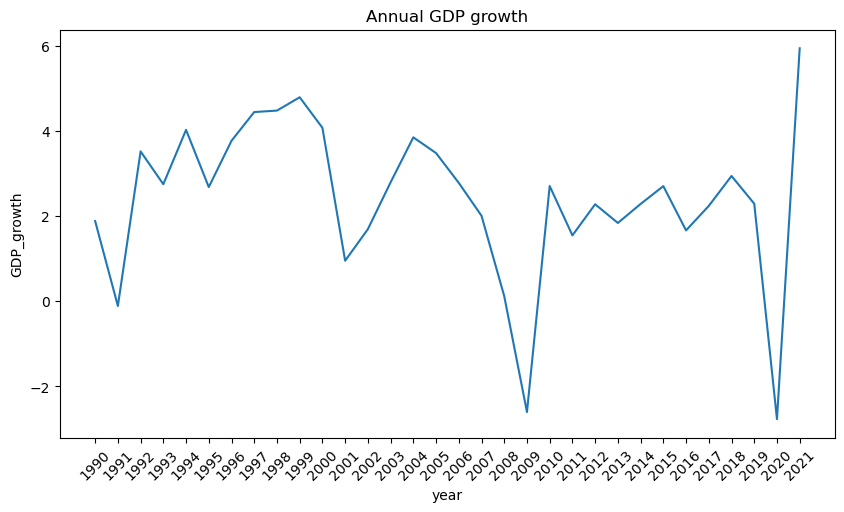

In [8]:
plot_func(wb_USAgdp, "year", "GDP_growth", "Annual GDP growth" )

Plot of the american inflation rate

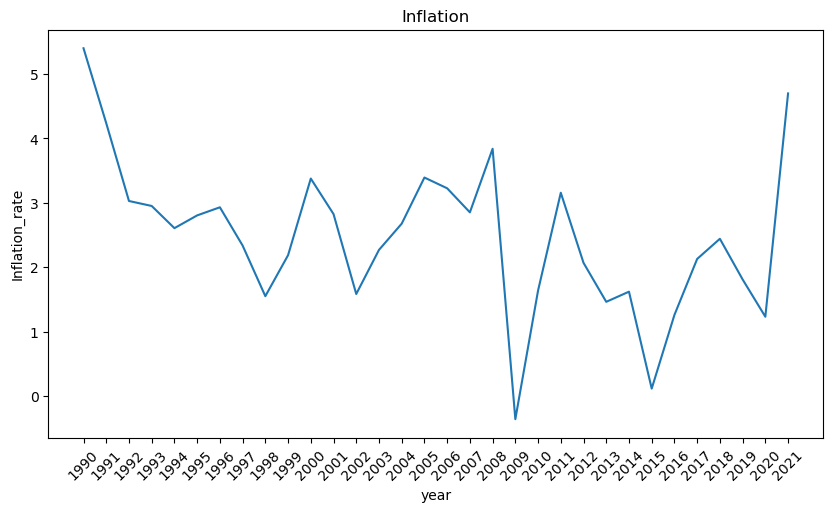

In [9]:
plot_func(wb_USAinf, "year", "Inflation_rate", "Inflation" )

Plot of the american employment rate

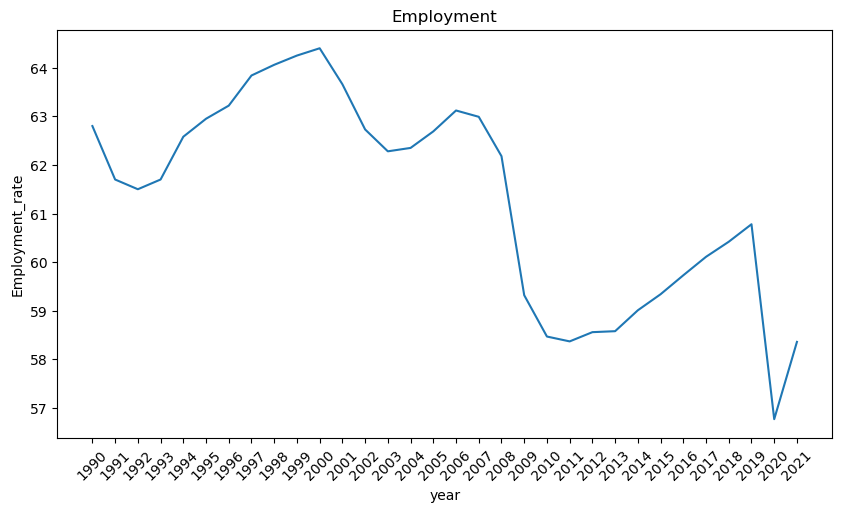

In [10]:
plot_func(wb_USAemp, "year", "Employment_rate", "Employment" )

Plot of the american real interest rate

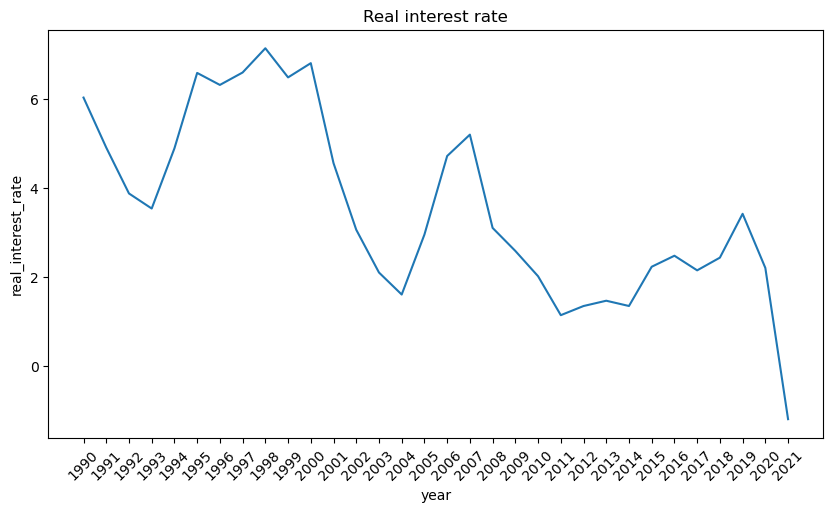

In [11]:
plot_func(wb_USAreal, "year", "real_interest_rate", "Real interest rate" )

# Merge data sets

**Merging the data sets**


*Note that data is loaded and cleaned from the start meaning the outer method will not include missing values*


In [12]:
dataset = [wb_USAgdp, wb_USAinf, wb_USAemp, wb_USAreal] # Initialize the list to iterate over

wb = dataset[0] # Define the baseline dataframe

for i in dataset[1:]: # Loop over the different dataframes
    wb = pd.merge(wb, i, how = 'outer', on = ['country','year'])

wb = wb.round(2) # set decimals to 2
wb.head(10)


,country,GDP_growth,Inflation_rate,Employment_rate,real_interest_rate
year,,,,,
1990,United States,1.89,5.40,62.80,6.04
1991,United States,-0.11,4.23,61.70,4.92
1992,United States,3.52,3.03,61.50,3.88
1993,United States,2.75,2.95,61.70,3.55
1994,United States,4.03,2.61,62.58,4.90
1995,United States,2.68,2.81,62.95,6.59
1996,United States,3.77,2.93,63.22,6.32
1997,United States,4.45,2.34,63.84,6.60
1998,United States,4.48,1.55,64.06,7.15


# Analysis

We now want to calculate the nominal interest rate to observe the relationship between the real interest and inflation which can be approximated via the fisher equation

A variable of the nominal interest rate is added to the wb dataframe using the fisher equation

In [13]:
wb["Nominal_interest_rate"] = wb.real_interest_rate + wb.Inflation_rate # calculate new variable to df using fisher equation
wb.sample(5)

,country,GDP_growth,Inflation_rate,Employment_rate,real_interest_rate,Nominal_interest_rate
year,,,,,,
2004,United States,3.85,2.68,62.35,1.61,4.29
1999,United States,4.79,2.19,64.25,6.49,8.68
1990,United States,1.89,5.40,62.80,6.04,11.44
2019,United States,2.29,1.81,60.78,3.43,5.24
2001,United States,0.95,2.83,63.66,4.57,7.40


Now we want to plot the variables from the fischer equation to see how they depend on each other, and if this applies to economic theory

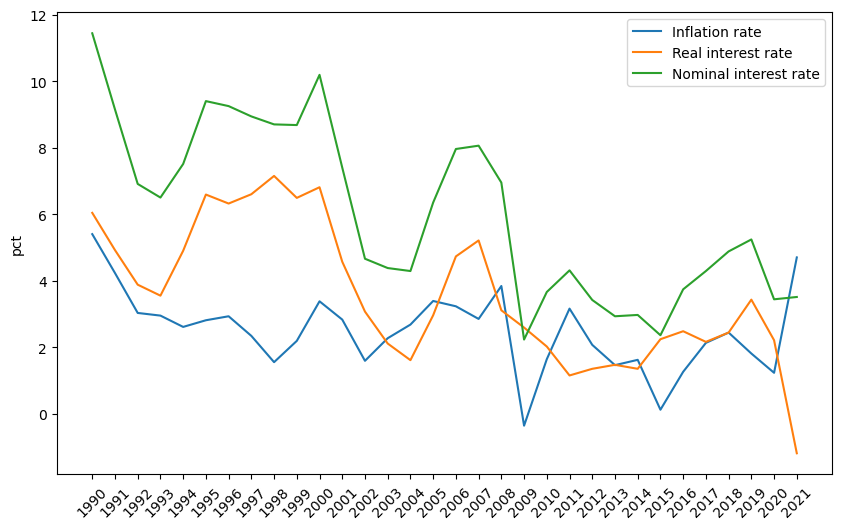

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
# Plotting directly from the pandas dataframe. Still using matplotlib under the hood.
plt.plot(wb.Inflation_rate, label="Inflation rate")
plt.plot(wb.real_interest_rate, label="Real interest rate")
plt.plot(wb.Nominal_interest_rate, label="Nominal interest rate")

ax.legend(frameon=True)
ax.set_xlabel('')
ax.set_ylabel('pct');
ax.tick_params(axis='x', rotation=45)

We also want analyze the validity of the phillipscurve which explains the relationship between the inflation rate and unemployment. theory dictates a negative corralation between the two. Although it has been discussed alot whether the phillip curve hold up in reality. This is just a high level approach to illutrate a potential relationship, and therefore a precise economic interpretation is not able to be made from this representation of the phillipscurve without an expansion of theory.   

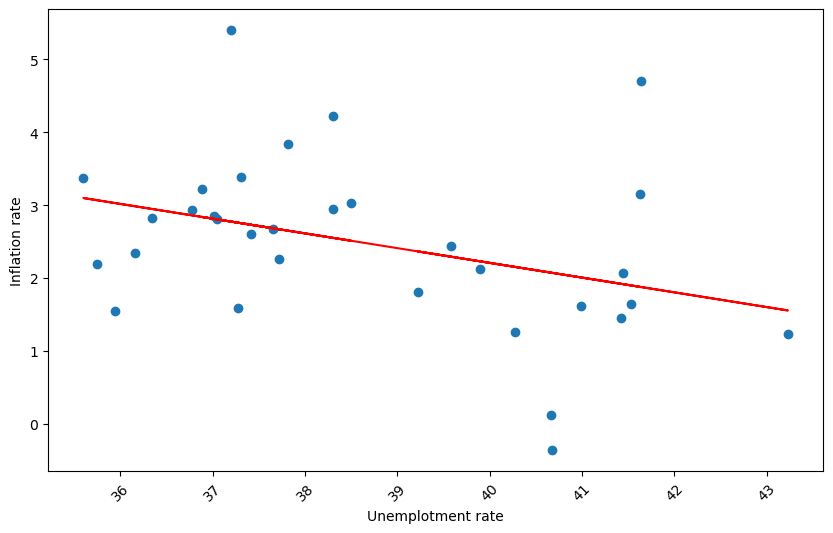

In [15]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
# Plotting directly from the pandas dataframe. Still using matplotlib under the hood.
ax.scatter(100-wb.Employment_rate, wb.Inflation_rate)

# calculate and plot trendline
z = np.polyfit(100-wb.Employment_rate, wb.Inflation_rate, 1)
p = np.poly1d(z)
ax.plot(100-wb.Employment_rate,p(100-wb.Employment_rate),"r")

ax.set_xlabel('Unemplotment rate')
ax.set_ylabel('Inflation rate');
ax.tick_params(axis='x', rotation=45)

The relationship between infaltion and unemployment seem to negative as the theory dictates.

# Conclusion

ADD CONCISE CONLUSION.